In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import datetime

sns.set_theme("notebook")
%matplotlib inline

### Chargement des données, séparé par machine

In [2]:
df = pd.read_csv("../../data/prepared_data/dataset.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df_by_machine = df.groupby("machineID")

# Visualisation temporelle

### Age des composants et défaillance

In [16]:
def composants(machine_number):
    df0 = df_by_machine.get_group(machine_number)
    plt.figure(figsize=(20,5))
    plt.plot(df0["datetime"],df0["comp1_delay"],"r.",label="comp1")
    plt.plot(df0["datetime"],df0["comp2_delay"],"b.",label="comp2")
    plt.plot(df0["datetime"],df0["comp3_delay"],"g.",label="comp3")
    plt.plot(df0["datetime"],df0["comp4_delay"],"c.",label="comp4")
    dates=df0["datetime"].values
    for i,fail in enumerate(df0["comp1"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "r", lw=3)
    for i,fail in enumerate(df0["comp2"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "b", lw=3)
    for i,fail in enumerate(df0["comp3"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "g", lw=3)
    for i,fail in enumerate(df0["comp4"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "c", lw=3)
    plt.legend()
    plt.title("Machine {}".format(machine_number))
    plt.savefig("../../Images/Age_composants_machine_{}.jpg".format(machine_number))

Les lignes verticales représentent les défaillances de composants, les courbes brisées linéaires le temps depuis leur dernier remplacement

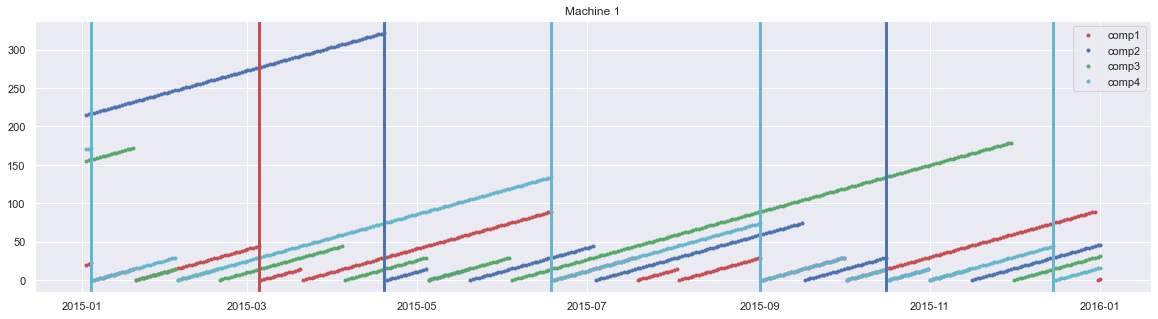

In [17]:
composants(1)

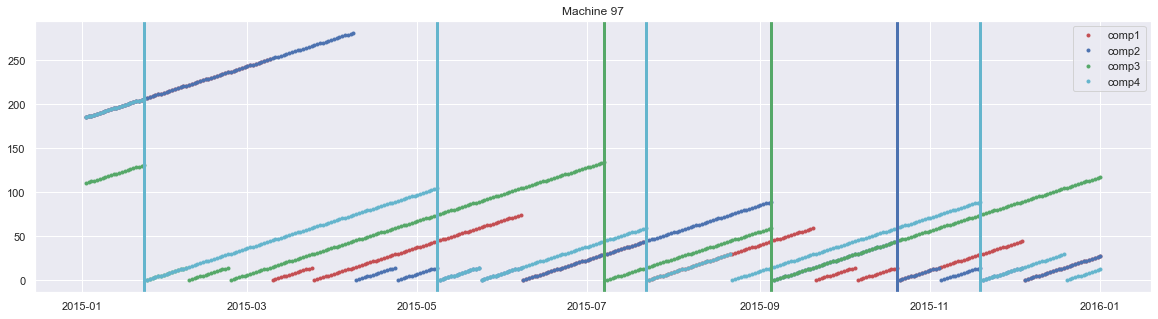

In [18]:
composants(97)

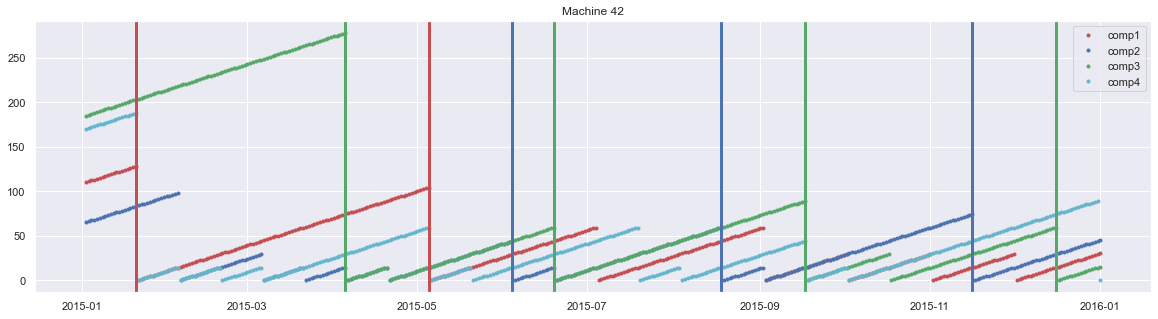

In [19]:
composants(42)

Il n'y a pas de corrélation évidente entre l'age des composants et la défaillance

### Erreurs et défaillances

In [24]:
def erreurs(machine_number):
    df0 = df_by_machine.get_group(machine_number)
    plt.figure(figsize=(20,2))
    dates=df0["datetime"].values
    for i,fail in enumerate(df0["comp1"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "r", lw=3)
    for i,fail in enumerate(df0["comp2"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "b", lw=3)
    for i,fail in enumerate(df0["comp3"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "g", lw=3)
    for i,fail in enumerate(df0["comp4"]):
        if fail == 1:
            plt.axvline(x=dates[i],c= "orange", lw=3)
    
    errors=[]
    error_dates = []
    for i,fail in enumerate(df0["error1"]):
        if fail == 1:
            errors.append(1)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error2"]):
        if fail == 1:
            errors.append(2)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error3"]):
        if fail == 1:
            errors.append(3)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error4"]):
        if fail == 1:
            errors.append(4)
            error_dates.append(dates[i])
    for i,fail in enumerate(df0["error5"]):
        if fail == 1:
            errors.append(5)
            error_dates.append(dates[i])
    plt.scatter( error_dates,errors, c=errors)
    
    plt.yticks([1,2,3,4,5],['error 1','error 2','error 3','error 4','error 5'])
    plt.xlim([datetime.date(2015, 1, 1), datetime.date(2016, 1, 1)])
    plt.title("Machine {}".format(machine_number))
    plt.savefig("../../Images/Erreurs_machine_{}.jpg".format(machine_number))

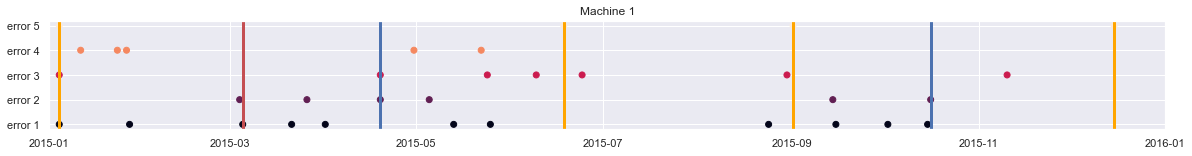

In [25]:
erreurs(1)

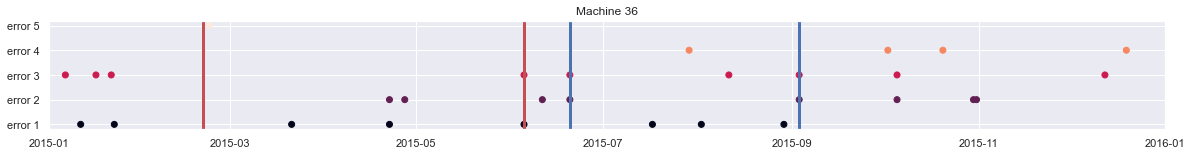

In [26]:
erreurs(36)

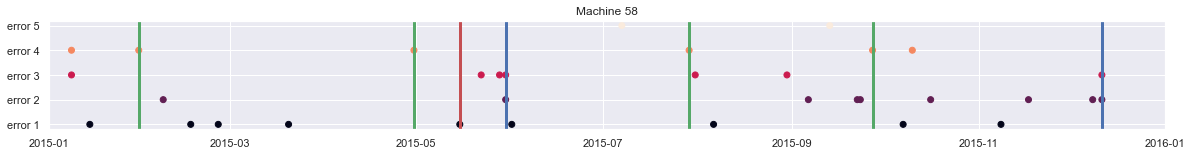

In [27]:
erreurs(58)